In [1]:
import pandas as pd
import os

In [2]:
scoring = pd.read_pickle(os.path.join("..", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("..", "team_splits.pickle"))

In [3]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [4]:
three_years = scoring.loc[(scoring.year > 2000) &
                          (scoring.year < 2004)]

# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# Get three random players with complete history between 2001-2003
counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index

# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[["playerID", "year", "G"]]

In [5]:
basic_df3

,playerID,year,G
7138,fedorto01,2001,3.0
7139,fedorto01,2002,1.0
7140,fedorto01,2003,1.0
16973,mellasc01,2001,15.0
16974,mellasc01,2002,26.0
16975,mellasc01,2003,14.0
19895,pellesc01,2001,1.0
19897,pellesc01,2002,1.0
19899,pellesc01,2003,0.0


In [6]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
fedorto01,3.0,1.0,1.0
mellasc01,15.0,26.0,14.0
pellesc01,1.0,1.0,0.0


In [7]:
pivot.index

Index(['fedorto01', 'mellasc01', 'pellesc01'], dtype='object', name='playerID')

In [8]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [9]:
pivot.index.name = None
pivot.columns.name = None

In [10]:
pivot

,2001,2002,2003
fedorto01,3.0,1.0,1.0
mellasc01,15.0,26.0,14.0
pellesc01,1.0,1.0,0.0


In [11]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

In [12]:
basic_df3.set_index("playerID").plot.bar();

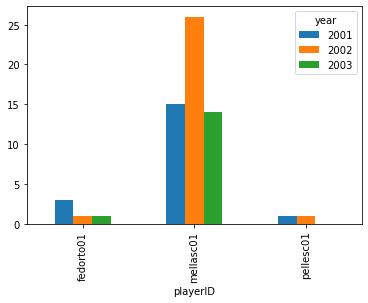

In [13]:
pivot.plot.bar();

In [14]:
pivot

year,2001,2002,2003
playerID,,,
fedorto01,3.0,1.0,1.0
mellasc01,15.0,26.0,14.0
pellesc01,1.0,1.0,0.0


In [15]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,fedorto01,3.0,1.0,1.0
1,mellasc01,15.0,26.0,14.0
2,pellesc01,1.0,1.0,0.0


In [16]:
pivot.melt()

,variable,value
0,playerID,fedorto01
1,playerID,mellasc01
2,playerID,pellesc01
3,2001,3
4,2001,15
5,2001,1
6,2002,1
7,2002,26
8,2002,1
9,2003,1


In [17]:

pivot.melt(id_vars="playerID")

,playerID,variable,value
0,fedorto01,2001,3.0
1,mellasc01,2001,15.0
2,pellesc01,2001,1.0
3,fedorto01,2002,1.0
4,mellasc01,2002,26.0
5,pellesc01,2002,1.0
6,fedorto01,2003,1.0
7,mellasc01,2003,14.0
8,pellesc01,2003,0.0


In [18]:

pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,fedorto01,2001,3.0
1,mellasc01,2001,15.0
2,pellesc01,2001,1.0
3,fedorto01,2002,1.0
4,mellasc01,2002,26.0
5,pellesc01,2002,1.0
6,fedorto01,2003,1.0
7,mellasc01,2003,14.0
8,pellesc01,2003,0.0


In [19]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002],
           var_name="year", value_name="goals")

,playerID,year,goals
0,fedorto01,2001,3.0
1,mellasc01,2001,15.0
2,pellesc01,2001,1.0
3,fedorto01,2002,1.0
4,mellasc01,2002,26.0
5,pellesc01,2002,1.0


In [20]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

,playerID,tmID,year,G
7138,fedorto01,PHI,2001,3.0
7139,fedorto01,PHI,2002,1.0
7140,fedorto01,PHI,2003,1.0
16973,mellasc01,STL,2001,15.0
16974,mellasc01,STL,2002,26.0
16975,mellasc01,STL,2003,14.0
19895,pellesc01,BOS,2001,1.0
19897,pellesc01,DAL,2002,1.0
19899,pellesc01,STL,2003,0.0


In [21]:
try:
    larger_df3.pivot(index=["playerID", "tmID"],
                     columns="year", values="G")
except Exception as e:
    print(e)
        

Length of passed values is 9, index implies 2


In [22]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

,playerID,year,G,A
7138,fedorto01,2001,3.0,4.0
7139,fedorto01,2002,1.0,5.0
7140,fedorto01,2003,1.0,4.0
16973,mellasc01,2001,15.0,26.0
16974,mellasc01,2002,26.0,31.0
16975,mellasc01,2003,14.0,17.0
19895,pellesc01,2001,1.0,5.0
19897,pellesc01,2002,1.0,3.0
19899,pellesc01,2003,0.0,0.0


In [23]:
test = larger_df3.pivot(index="playerID", columns="year",
                        values=["G", "A"])
test

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
fedorto01   3.0   1.0   1.0   4.0   5.0   4.0
mellasc01  15.0  26.0  14.0  26.0  31.0  17.0
pellesc01   1.0   1.0   0.0   5.0   3.0   0.0

In [24]:
test.columns

MultiIndex(levels=[['G', 'A'], [2001, 2002, 2003]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'year'])